In [754]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree
from sklearn import metrics
from yellowbrick.classifier import ROCAUC
from yellowbrick.model_selection import ValidationCurve
import matplotlib.pyplot as plt
import seaborn as sns

# Load data: Merge & Concatenation

In [755]:
movie_metadata=pd.read_csv('./movie_metadata.csv')
movie_metadata
df = movie_metadata

# Explore data:

In [756]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

Number of missing values

In [757]:
df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [758]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [759]:
df.value_counts()

director_name     num_critic_for_reviews  duration  director_facebook_likes  actor_3_facebook_likes  actor_2_name         actor_1_facebook_likes  gross       genres                                actor_1_name         movie_title          num_voted_users  cast_total_facebook_likes  actor_3_name     facenumber_in_poster  plot_keywords                                                      movie_imdb_link                                       num_user_for_reviews  language  country      content_rating  budget      title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes
Frank Oz          168.0                   87.0      0.0                      548.0                   Ewen Bremner         22000.0                 8579684.0   Comedy                                Peter Dinklage       Death at a Funeral   89547            24324                      Kris Marshall    0.0                   end credits roll call|four word title|funeral|secret|uncle         http://www.imd

<AxesSubplot:xlabel='imdb_score', ylabel='Count'>

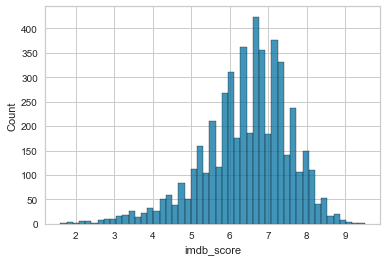

In [760]:
sns.histplot(df['imdb_score'])

### Data cleaning

6.4 6.7


<AxesSubplot:xlabel='imdb_score', ylabel='Count'>

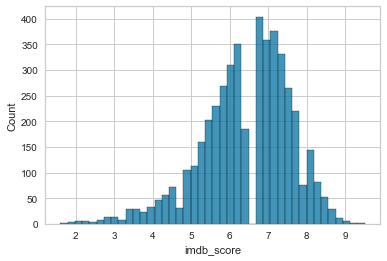

In [761]:
percentile45 = df['imdb_score'].quantile(0.45)
percentile55 = df['imdb_score'].quantile(0.55)
print(percentile45, percentile55)
df = df.drop(df[(df['imdb_score'] > percentile45) & (df['imdb_score'] < percentile55)].index)
df
sns.histplot(df['imdb_score'])

In [762]:
df['high_imdb_score'] = np.where(df['imdb_score'] >= percentile55 , 1, 0)
df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,high_imdb_score
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,Kerry Bishé,...,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413,0
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84,1
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000,1
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,...,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16,0


In [763]:
df_nonull = df.dropna(how='any')
df_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3441 entries, 0 to 5035
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              3441 non-null   object 
 1   num_critic_for_reviews     3441 non-null   float64
 2   duration                   3441 non-null   float64
 3   director_facebook_likes    3441 non-null   float64
 4   actor_3_facebook_likes     3441 non-null   float64
 5   actor_2_name               3441 non-null   object 
 6   actor_1_facebook_likes     3441 non-null   float64
 7   gross                      3441 non-null   float64
 8   genres                     3441 non-null   object 
 9   actor_1_name               3441 non-null   object 
 10  movie_title                3441 non-null   object 
 11  num_voted_users            3441 non-null   int64  
 12  cast_total_facebook_likes  3441 non-null   int64  
 13  actor_3_name               3441 non-null   objec

In [764]:
original_rows = df.shape[0]
dropped_rows = original_rows - df_nonull.shape[0]
percent_dropped = 100 * dropped_rows / original_rows
print("Percentage of rows dropped: {:.2f}%".format(percent_dropped))

Percentage of rows dropped: 26.10%


In [765]:
df_nonull.describe().round(0)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,high_imdb_score
count,3441.0,3441.0,3441.0,3441.0,3441.0,3441.0,3441.0,3441.0,3441.0,3441.0,3.441000e+03,3441.0,3441.0,3441.0,3441.0,3441.0,3441.0
mean,168.0,110.0,818.0,773.0,7678.0,52825981.0,108432.0,11447.0,1.0,343.0,4.669174e+07,2003.0,2014.0,6.0,2.0,9638.0,1.0
std,125.0,23.0,3091.0,1911.0,15879.0,70975873.0,156842.0,19431.0,2.0,416.0,2.356551e+08,10.0,4564.0,1.0,0.0,22047.0,1.0
min,2.0,37.0,0.0,0.0,0.0,162.0,91.0,0.0,0.0,4.0,2.180000e+02,1927.0,0.0,2.0,1.0,0.0,0.0
25%,77.0,96.0,11.0,194.0,744.0,8406264.0,19671.0,1920.0,0.0,111.0,1.000000e+07,1999.0,387.0,6.0,2.0,0.0,0.0
50%,139.0,106.0,64.0,435.0,1000.0,30012990.0,53341.0,3962.0,1.0,211.0,2.500000e+07,2004.0,683.0,7.0,2.0,251.0,1.0
75%,224.0,120.0,243.0,687.0,12000.0,66862068.0,132423.0,16196.0,2.0,409.0,5.000000e+07,2010.0,973.0,7.0,2.0,11000.0,1.0
max,813.0,330.0,22000.0,23000.0,640000.0,760505847.0,1689764.0,656730.0,43.0,5060.0,1.221550e+10,2016.0,137000.0,9.0,16.0,349000.0,1.0


# Preprocess data

### Onehot encode

In [766]:
df_nonull['director_name'].value_counts()

Steven Spielberg    23
Woody Allen         18
Martin Scorsese     16
Clint Eastwood      16
Ridley Scott        15
                    ..
John Fortenberry     1
Daniel Barnz         1
Jason Moore          1
Trent Cooper         1
Shane Carruth        1
Name: director_name, Length: 1581, dtype: int64

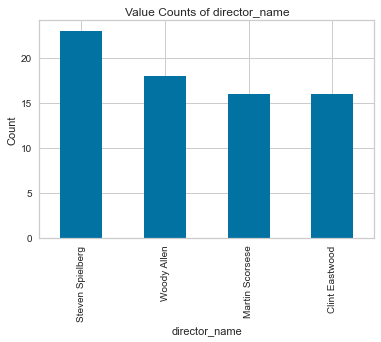

In [767]:
value_counts = df_nonull['director_name'].value_counts()
value_counts = value_counts[value_counts>15]
value_counts.plot(kind='bar')
plt.xlabel('director_name')
plt.ylabel('Count')
plt.title('Value Counts of {}'.format('director_name'))
plt.show()

In [768]:
df_nonull['actor_1_name'].value_counts()

Robert De Niro       41
Johnny Depp          35
J.K. Simmons         28
Nicolas Cage         27
Denzel Washington    25
                     ..
Marisa Saks           1
Peter Firth           1
Isaiah Washington     1
Johnny Lewis          1
Carlos Gallardo       1
Name: actor_1_name, Length: 1356, dtype: int64

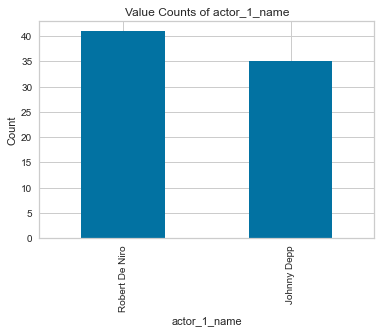

In [769]:
value_counts = df_nonull['actor_1_name'].value_counts()
value_counts = value_counts[value_counts>=30]
value_counts.plot(kind='bar')
plt.xlabel('actor_1_name')
plt.ylabel('Count')
plt.title('Value Counts of {}'.format('actor_1_name'))
plt.show()

In [770]:
df_nonull['actor_2_name'].value_counts()

Morgan Freeman     17
Charlize Theron    14
Brad Pitt          14
James Franco       10
Will Ferrell        9
                   ..
Deborah Twiss       1
Lily Rabe           1
Omri Katz           1
Noah Lomax          1
Peter Marquardt     1
Name: actor_2_name, Length: 2077, dtype: int64

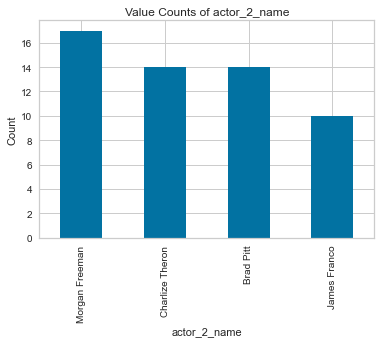

In [771]:
value_counts = df_nonull['actor_2_name'].value_counts()
value_counts = value_counts[value_counts>=10]
value_counts.plot(kind='bar')
plt.xlabel('actor_2_name')
plt.ylabel('Count')
plt.title('Value Counts of {}'.format('actor_2_name'))
plt.show()

In [772]:
df_nonull['actor_3_name'].value_counts()

Steve Coogan           8
Kirsten Dunst          7
Clifton Collins Jr.    6
Ben Mendelsohn         6
Craig T. Nelson        6
                      ..
Peter Sallis           1
Tanya Roberts          1
Priscilla Presley      1
Anne Meara             1
Consuelo Gómez         1
Name: actor_3_name, Length: 2418, dtype: int64

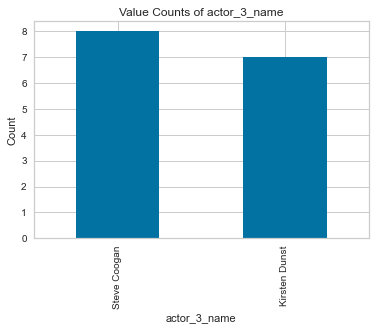

In [773]:
value_counts = df_nonull['actor_3_name'].value_counts()
value_counts = value_counts[value_counts>=7]
value_counts.plot(kind='bar')
plt.xlabel('actor_3_name')
plt.ylabel('Count')
plt.title('Value Counts of {}'.format('actor_3_name'))
plt.show()

In [774]:
df_nonull['genres'].value_counts()

Drama                                          130
Comedy|Drama|Romance                           129
Comedy                                         128
Comedy|Drama                                   125
Comedy|Romance                                 118
                                              ... 
Action|Adventure|Drama|Thriller|Western          1
Animation|Comedy|Family|Horror|Sci-Fi            1
Action|Drama|Sci-Fi|Sport                        1
Adventure|Comedy|Drama|Romance|Thriller|War      1
Comedy|Crime|Horror                              1
Name: genres, Length: 719, dtype: int64

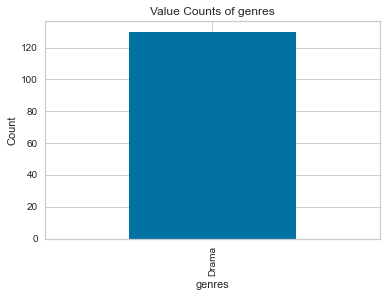

In [775]:
value_counts = df_nonull['genres'].value_counts()
value_counts = value_counts[value_counts>=130]
value_counts.plot(kind='bar')
plt.xlabel('genres')
plt.ylabel('Count')
plt.title('Value Counts of {}'.format('genres'))
plt.show()

In [776]:
df_nonull['content_rating'].value_counts()

R            1535
PG-13        1213
PG            521
G              80
Not Rated      34
Unrated        20
Approved       17
X               9
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

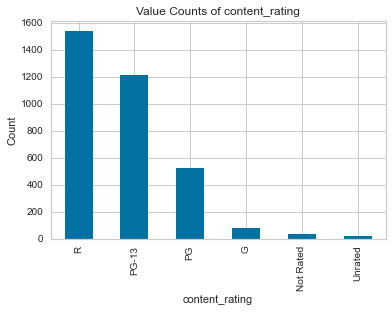

In [777]:
value_counts = df_nonull['content_rating'].value_counts()
value_counts = value_counts[value_counts>=20]
value_counts.plot(kind='bar')
plt.xlabel('content_rating')
plt.ylabel('Count')
plt.title('Value Counts of {}'.format('content_rating'))
plt.show()

In [778]:
df_nonull['language'].value_counts()

English       3290
French          33
Spanish         21
Mandarin        14
German          10
Japanese        10
Cantonese        7
Italian          6
Portuguese       5
Hindi            5
Korean           5
Norwegian        4
Danish           3
Persian          3
Dutch            3
Dari             2
Indonesian       2
Aboriginal       2
Thai             2
Aramaic          1
Hungarian        1
Kazakh           1
Maya             1
Filipino         1
Mongolian        1
Czech            1
None             1
Zulu             1
Hebrew           1
Arabic           1
Vietnamese       1
Bosnian          1
Romanian         1
Name: language, dtype: int64

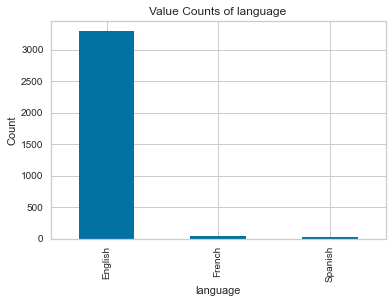

In [779]:
value_counts = df_nonull['language'].value_counts()
value_counts = value_counts[value_counts>=20]
value_counts.plot(kind='bar')
plt.xlabel('language')
plt.ylabel('Count')
plt.title('Value Counts of {}'.format('language'))
plt.show()

In [780]:
df_nonull['country'].value_counts()

USA               2725
UK                 298
France              91
Germany             74
Canada              55
Australia           34
Spain               20
Japan               15
China               14
Hong Kong           12
New Zealand         11
Italy                9
South Korea          8
Denmark              8
Ireland              7
Mexico               5
Brazil               5
India                5
Norway               4
Iran                 3
Argentina            3
Thailand             3
Netherlands          3
Czech Republic       3
Hungary              2
Taiwan               2
Romania              2
South Africa         2
Russia               2
Peru                 1
New Line             1
Indonesia            1
Israel               1
Poland               1
Colombia             1
Iceland              1
Finland              1
Aruba                1
Georgia              1
West Germany         1
Chile                1
Official site        1
Greece               1
Belgium    

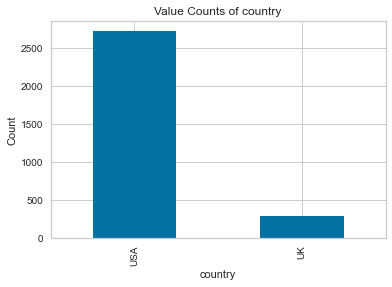

In [781]:
value_counts = df_nonull['country'].value_counts()
value_counts = value_counts[value_counts>=100]
value_counts.plot(kind='bar')
plt.xlabel('country')
plt.ylabel('Count')
plt.title('Value Counts of {}'.format('country'))
plt.show()

In [782]:
df_dropped = df_nonull.drop(columns=['movie_title','actor_3_name','plot_keywords','movie_imdb_link'])
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3441 entries, 0 to 5035
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              3441 non-null   object 
 1   num_critic_for_reviews     3441 non-null   float64
 2   duration                   3441 non-null   float64
 3   director_facebook_likes    3441 non-null   float64
 4   actor_3_facebook_likes     3441 non-null   float64
 5   actor_2_name               3441 non-null   object 
 6   actor_1_facebook_likes     3441 non-null   float64
 7   gross                      3441 non-null   float64
 8   genres                     3441 non-null   object 
 9   actor_1_name               3441 non-null   object 
 10  num_voted_users            3441 non-null   int64  
 11  cast_total_facebook_likes  3441 non-null   int64  
 12  facenumber_in_poster       3441 non-null   float64
 13  num_user_for_reviews       3441 non-null   float

In [783]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = ""
 
def onehot_top_k(df, column, threshold):
    values_count = df[column].value_counts()
    frequent_values = values_count[values_count >= threshold].index.tolist()
    df[column] = df[column].apply(lambda x: x if x in frequent_values else 'others')
    onehot = OneHotEncoder()
    encoder = onehot
    onehot_values = onehot.fit_transform(df[[column]]).toarray()
    onehot_labels = [f"{column}_{val}" for val in onehot.categories_[0]]
    onehot_df = pd.DataFrame(onehot_values, columns=onehot_labels)
    df = pd.concat([df.reset_index(drop=True), onehot_df.reset_index(drop=True)], axis=1) # MUST RESET INDEX
    df = df.drop(column, axis=1)
    return df

custom_df_dropped = onehot_top_k(df_dropped, 'director_name', 19)
custom_df_dropped = onehot_top_k(custom_df_dropped, 'actor_1_name', 35)
custom_df_dropped = onehot_top_k(custom_df_dropped, 'actor_2_name', 20)
custom_df_dropped = onehot_top_k(custom_df_dropped, 'content_rating', 500)
custom_df_dropped = onehot_top_k(custom_df_dropped, 'language', 3000)
custom_df_dropped = onehot_top_k(custom_df_dropped, 'country', 2000)
custom_df_dropped = onehot_top_k(custom_df_dropped, 'genres', 125)
custom_df_dropped

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,content_rating_others,language_English,language_others,country_USA,country_others,genres_Comedy,genres_Comedy|Drama,genres_Comedy|Drama|Romance,genres_Drama,genres_others
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,392.0,156.0,0.0,4000.0,24000.0,336530303.0,383056,46055,0.0,1902.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3436,73.0,108.0,0.0,105.0,462.0,180483.0,16792,760,2.0,183.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3437,81.0,110.0,107.0,45.0,576.0,136007.0,3924,776,1.0,39.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3438,64.0,90.0,397.0,0.0,5.0,673780.0,4555,5,0.0,26.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3439,143.0,77.0,291.0,8.0,291.0,424760.0,72639,368,0.0,371.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [784]:
custom_df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441 entries, 0 to 3440
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   num_critic_for_reviews          3441 non-null   float64
 1   duration                        3441 non-null   float64
 2   director_facebook_likes         3441 non-null   float64
 3   actor_3_facebook_likes          3441 non-null   float64
 4   actor_1_facebook_likes          3441 non-null   float64
 5   gross                           3441 non-null   float64
 6   num_voted_users                 3441 non-null   int64  
 7   cast_total_facebook_likes       3441 non-null   int64  
 8   facenumber_in_poster            3441 non-null   float64
 9   num_user_for_reviews            3441 non-null   float64
 10  budget                          3441 non-null   float64
 11  title_year                      3441 non-null   float64
 12  actor_2_facebook_likes          34

### Split train-test

In [785]:
data = df_dropped.copy()

### DT1

In [786]:
data2=data.copy()
encoder=OneHotEncoder(dtype=np.int32,handle_unknown="ignore")


In [787]:
columns = data2.columns.tolist()
columns.remove('high_imdb_score')

print(columns)

['director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']


In [788]:
# data1=df_dropped.copy()
# data1=pd.get_dummies(data1,columns=['weather','temp'])
# data1

In [789]:
data2=data.copy()
encoder=OneHotEncoder(dtype=np.int32,handle_unknown="ignore")
data2


,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,high_imdb_score
0,others,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,others,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,others,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,others,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
6,others,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,...,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5025,others,73.0,108.0,0.0,105.0,Mink Stole,462.0,180483.0,Comedy|Crime|Horror,Divine,...,English,USA,NC-17,10000.0,1972.0,143.0,6.1,1.37,0,0
5026,others,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,Maggie Cheung,...,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171,1
5027,others,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,Fereshteh Sadre Orafaiy,...,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697,1
5033,others,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,...,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000,1


In [791]:
data2=pd.DataFrame(encoder.fit_transform(data2[data2.columns.tolist()]).toarray(),columns=np.array(encoder.categories_).flatten())

KeyError: "None of [Index([('director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'high_imdb_score')], dtype='object')] are in the [columns]"

In [ ]:
# data2=pd.DataFrame(encoder.fit_transform(data2[
#   [
#     'num_critic_for_reviews', 'duration'
#   ]
# ]).toarray(),columns=np.array(encoder.categories_).flatten())

In [ ]:
data2 = data2.drop(['high_imdb_score'], axis = 1)

In [ ]:
data2=pd.DataFrame(encoder.fit_transform(data2[['weather','temp']]).toarray(),columns=np.array(encoder.categories_).flatten())

KeyError: "None of [Index(['weather', 'temp'], dtype='object')] are in the [columns]"

In [ ]:
DT1= DecisionTreeClassifier(criterion='entropy',splitter='best',
max_depth=None,min_samples_split=2,min_samples_leaf=1)
# Train the model using the training sets
DT1.fit(data2,data['high_imdb_score'])

DecisionTreeClassifier(criterion='entropy')

In [ ]:
#Predict Output

data2['high_imdb_score_predicted']= DT1.predict(data2)
data2['high_imdb_score']=data['high_imdb_score']
data2

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,language_others,country_USA,country_others,genres_Comedy,genres_Comedy|Drama,genres_Comedy|Drama|Romance,genres_Drama,genres_others,high_imdb_score_predicted,high_imdb_score
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
4,392.0,156.0,0.0,4000.0,24000.0,336530303.0,383056,46055,0.0,1902.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3436,73.0,108.0,0.0,105.0,462.0,180483.0,16792,760,2.0,183.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
3437,81.0,110.0,107.0,45.0,576.0,136007.0,3924,776,1.0,39.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1
3438,64.0,90.0,397.0,0.0,5.0,673780.0,4555,5,0.0,26.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1
3439,143.0,77.0,291.0,8.0,291.0,424760.0,72639,368,0.0,371.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1


In [ ]:
print("Classification Report: \n",metrics.classification_report(data2['high_imdb_score'],data2['high_imdb_score_predicted']),'\n')

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1701
           1       1.00      1.00      1.00      1740

    accuracy                           1.00      3441
   macro avg       1.00      1.00      1.00      3441
weighted avg       1.00      1.00      1.00      3441
 



### Encoding data features

### Fill in missing value in train dataset

### Select features in train dataset

# Model

### Debug the Decision Tree model to make the model work for train dataset

### Preprocess (based on train dataset) and predict test dataset

### Evaluate classification result of test dataset

### Interpret the feature importance